In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from TradingDataFrame import TradingDataFrame
from strategy import Strategy
import calendar
from matplotlib import pyplot as plt
import seaborn as sn
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
from scipy.stats import norm
import statsmodels.api as sm
import yfinance as yf

In [6]:
api_key = 'uD7GhqYsUvfhpM3KDSAsqKXsXD3fVtvzdICbDEPPpSMMG4dQIFq532ETpUy98aud'
api_secret = 'nWdUsoGfUYXH7TzuNqio0W9O6ADOSezLCIJ9V6dvMS6wYqN2I0prvAeLxNF53yl2'
client = Client(api_key, api_secret)
today_date = str(datetime.today().day+1) + ' ' + calendar.month_abbr[datetime.today().month] + ' ' + str(datetime.today().year)

klines = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '16 Jan 2017', today_date)
klines_cols = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close time',
    'Quote asset volume',
    'Number of trades',
    'Taker buy base asset volume',
    'Taker buy quote asset volume',
    'Ignore']

df = pd.DataFrame(klines, columns=klines_cols)
df_btc = df[['Open Time', 'Close']]

tdf_btc = TradingDataFrame(df_btc, time_col='Open Time', price_cols=['Close'], time_unit='ms')

In [7]:
tdf_btc.log_returns

,Close
Open Time,
2017-08-18,-0.042103
2017-08-19,0.007663
2017-08-20,-0.013050
2017-08-21,-0.017347
2017-08-22,0.005957
...,...
2023-04-14,0.003060
2023-04-15,-0.005656
2023-04-16,0.000316


In [8]:
spy = yf.Ticker('SPY')
df_spy = spy.history(period='7y')
df_spy = df_spy[['Close']]
df_spy.index = pd.to_datetime(df_spy.index.date)

- SPY: No data found for this date range, symbol may be delisted


AttributeError: 'Index' object has no attribute 'date'

In [ ]:
# Merge prices
df_combine = pd.merge(tdf_btc.data, df_spy, left_index=True, right_index=True, how='left', suffixes=['_BTC', '_SPY'])

# Interpolate missing dates (Sat, Sun)
df_combine = df_combine.interpolate()
df_combine = df_combine.reset_index()
df_combine

,Open Time,Close_BTC,Close_SPY
0,2017-08-17,4285.08,220.117325
1,2017-08-18,4108.37,219.773209
2,2017-08-19,4139.98,219.830561
3,2017-08-20,4086.29,219.887914
4,2017-08-21,4016.00,219.945267
...,...,...,...
2066,2023-04-14,30466.93,412.459991
2067,2023-04-15,30295.09,412.953328
2068,2023-04-16,30304.65,413.446665
2069,2023-04-17,29430.27,413.940002


In [ ]:
tdf_all = TradingDataFrame(df_combine, time_col='Open Time', price_cols=['Close_BTC', 'Close_SPY'])

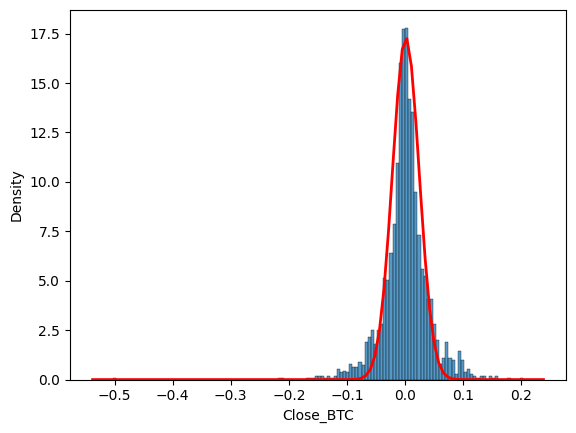

In [ ]:
tdf_all.fit_pdf(col='Close_BTC', data='log_returns', distribution='t')

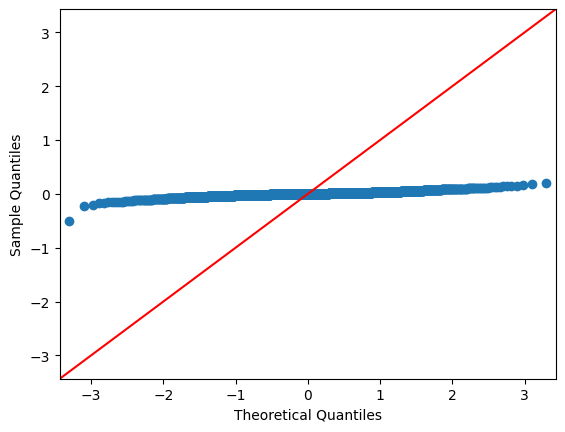

In [ ]:
x = tdf_all.qqplot(col='Close_BTC', data='log_returns')

In [ ]:
tdf_all.log_returns.corr()

,Close_BTC,Close_SPY
Close_BTC,1.000000,0.260456
Close_SPY,0.260456,1.000000
